<a href="https://colab.research.google.com/github/lucianoigit/Data_scientist/blob/main/Arbol_Clasificador.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
"""
autor: Luciano Iriarte
Tema: Arbol de desicion como clasificador
Dataset: Titanic
"""

'\nautor: Luciano Iriarte\nTema: Arbol de desicion como clasificador\nDataset: Titanic\n'

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

warnings.filterwarnings("ignore")

In [2]:
# Cargo el dataset
titanic=sns.load_dataset("titanic")
print(titanic.shape)
print(titanic.columns)
titanic.head()

(891, 15)
Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
titanic.describe() # estadisticas de los valores numericos

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
# veo si hay datos ausentes
print(f"hay datos ausentes?{titanic.isnull().any().any()}")
titanic.info()

hay datos ausentes?True
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


survived
0    549
1    342
dtype: int64


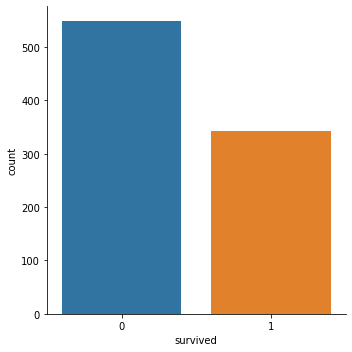

In [5]:
print(titanic.groupby("survived").size())
sns.catplot("survived",data=titanic,kind="count")

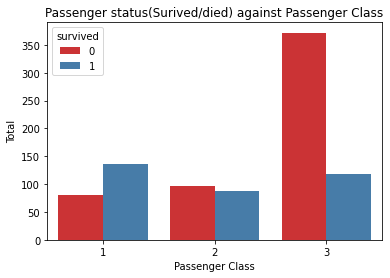

In [ ]:
ax=sns.countplot(x="pclass", hue="survived",palette="Set1",data=titanic)
ax.set(title="Passenger status(Surived/died) against Passenger Class",
       xlabel="Passenger Class",ylabel="Total")
plt.show()

survived    0    1
sex               
female     81  233
male      468  109


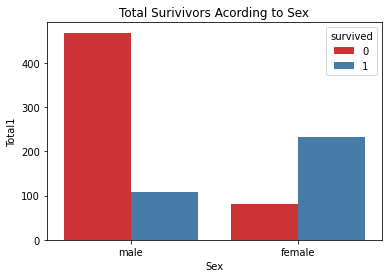

In [8]:
print(pd.crosstab(titanic.sex,titanic.survived))
ax=sns.countplot(x="sex",hue="survived",palette="Set1",data=titanic)
ax.set(title="Total Surivivors Acording to Sex",xlabel="Sex",ylabel="Total1")
plt.show()


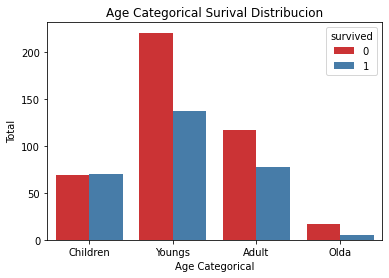

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
 15  age_cats     714 non-null    category
dtypes: bool(2), category(3), float64(2), int64(4), object(5)
memory usage: 81.7+ KB


In [14]:
# we look at age column and set intervals on the ages and the map then to them to their categories as
# (Children,Teen,Adult,Old)
interval=(0,18,35,60,120)
categories=["Children","Youngs","Adult","Olda"]
titanic["age_cats"]=pd.cut(titanic.age,interval,labels=categories)
ax=sns.countplot(x="age_cats",data=titanic,hue="survived",palette="Set1")
ax.set(xlabel="Age Categorical",ylabel="Total",
        title="Age Categorical Surival Distribucion")
plt.show()
titanic.info()


survived    0    1
embarked          
C          75   93
Q          47   30
S         427  217


<function matplotlib.pyplot.show(*args, **kw)>

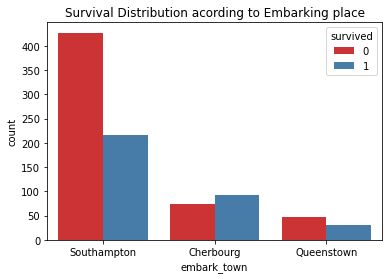

In [15]:
print(pd.crosstab(titanic.embarked,titanic.survived))
ax=sns.countplot(x="embark_town",hue="survived",palette="Set1",data=titanic)
ax.set(title="Survival Distribution acording to Embarking place")
plt.show

In [17]:
#%%  PREPARO LOS DATOS PARA EL MODELO
# asigno el valor medio a los faltantes de la columna 'age'
titanic['age'] = titanic['age'].fillna(titanic.groupby(['pclass', 'sex'])['age'].transform('mean'))
titanic.info()
# quedaron casi todas las columnas sin NaN, excepto 'deck' que sólo tiene 203 valores no nulos
# esa columna la eliminaremos pues no tiene suficientes datos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          891 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
 15  age_cats     714 non-null    category
dtypes: bool(2), category(3), float64(2), int64(4), object(5)
memory usage: 81.7+ KB


In [18]:
# elijo las características predictoras, eliminamos las redundantes x estar duplicadas
X_not = titanic.drop(['deck', 'alive', 'who', 'embarked', 'pclass',"age_cats"], axis=1)
print(X_not.head())

   survived     sex   age  sibsp  parch     fare  class  adult_male  \
0         0    male  22.0      1      0   7.2500  Third        True   
1         1  female  38.0      1      0  71.2833  First       False   
2         1  female  26.0      0      0   7.9250  Third       False   
3         1  female  35.0      1      0  53.1000  First       False   
4         0    male  35.0      0      0   8.0500  Third        True   

   embark_town  alone  
0  Southampton  False  
1    Cherbourg  False  
2  Southampton   True  
3  Southampton  False  
4  Southampton   True  


In [20]:
# aplico el método de Pandas equivalente a OneHotEncoder sobre class, 
# recordar que sólo opera sobre columnas con type= 'object' o 'category'
# pandas.get_dummies(data, prefix=None, prefix_sep=’_’, dummy_na=False, 
#                    columns=None, sparse=False, drop_first=False, dtype=None)
X=pd.get_dummies(X_not, prefix_sep='-', dummy_na=False, columns=['class', 'embark_town'])
# modifique las olumnas tipo categoricas
# aplicamos el Encoder sobre las variables que son 'etiquetables'
le = LabelEncoder()
columns=['sex', 'adult_male', 'alone']
for col in columns:
    X[col] = le.fit_transform(X[col])

print(X.shape)
X.head()

(891, 14)


,survived,sex,age,sibsp,parch,fare,adult_male,alone,class-First,class-Second,class-Third,embark_town-Cherbourg,embark_town-Queenstown,embark_town-Southampton
0,0,1,22.0,1,0,7.2500,1,0,0,0,1,0,0,1
1,1,0,38.0,1,0,71.2833,0,0,1,0,0,1,0,0
2,1,0,26.0,0,0,7.9250,0,1,0,0,1,0,0,1
3,1,0,35.0,1,0,53.1000,0,0,1,0,0,0,0,1
4,0,1,35.0,0,0,8.0500,1,1,0,0,1,0,0,1


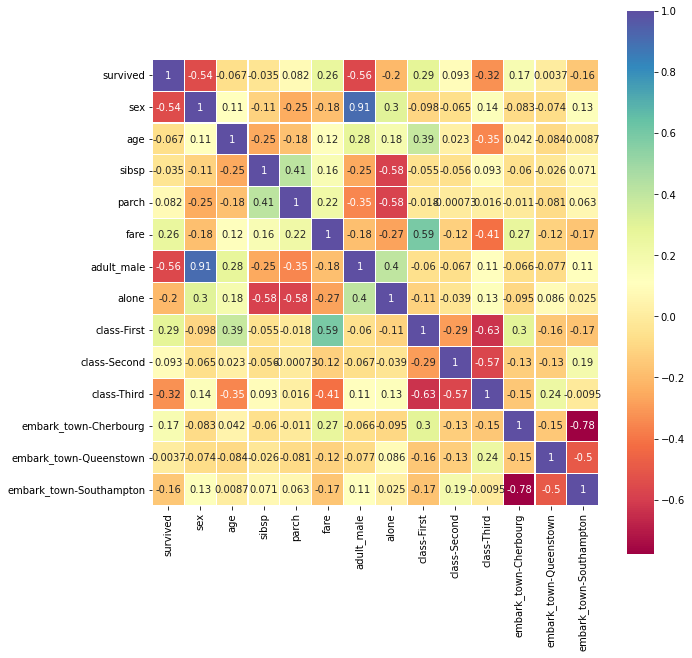

In [21]:
plt.figure(figsize=(10,10))
sns.heatmap(X.corr(),linewidths=0.1, square=True,  linecolor='white', annot=True, cmap='Spectral')
plt.show()
plt.close()
# Matriz de correlacion de Pearson

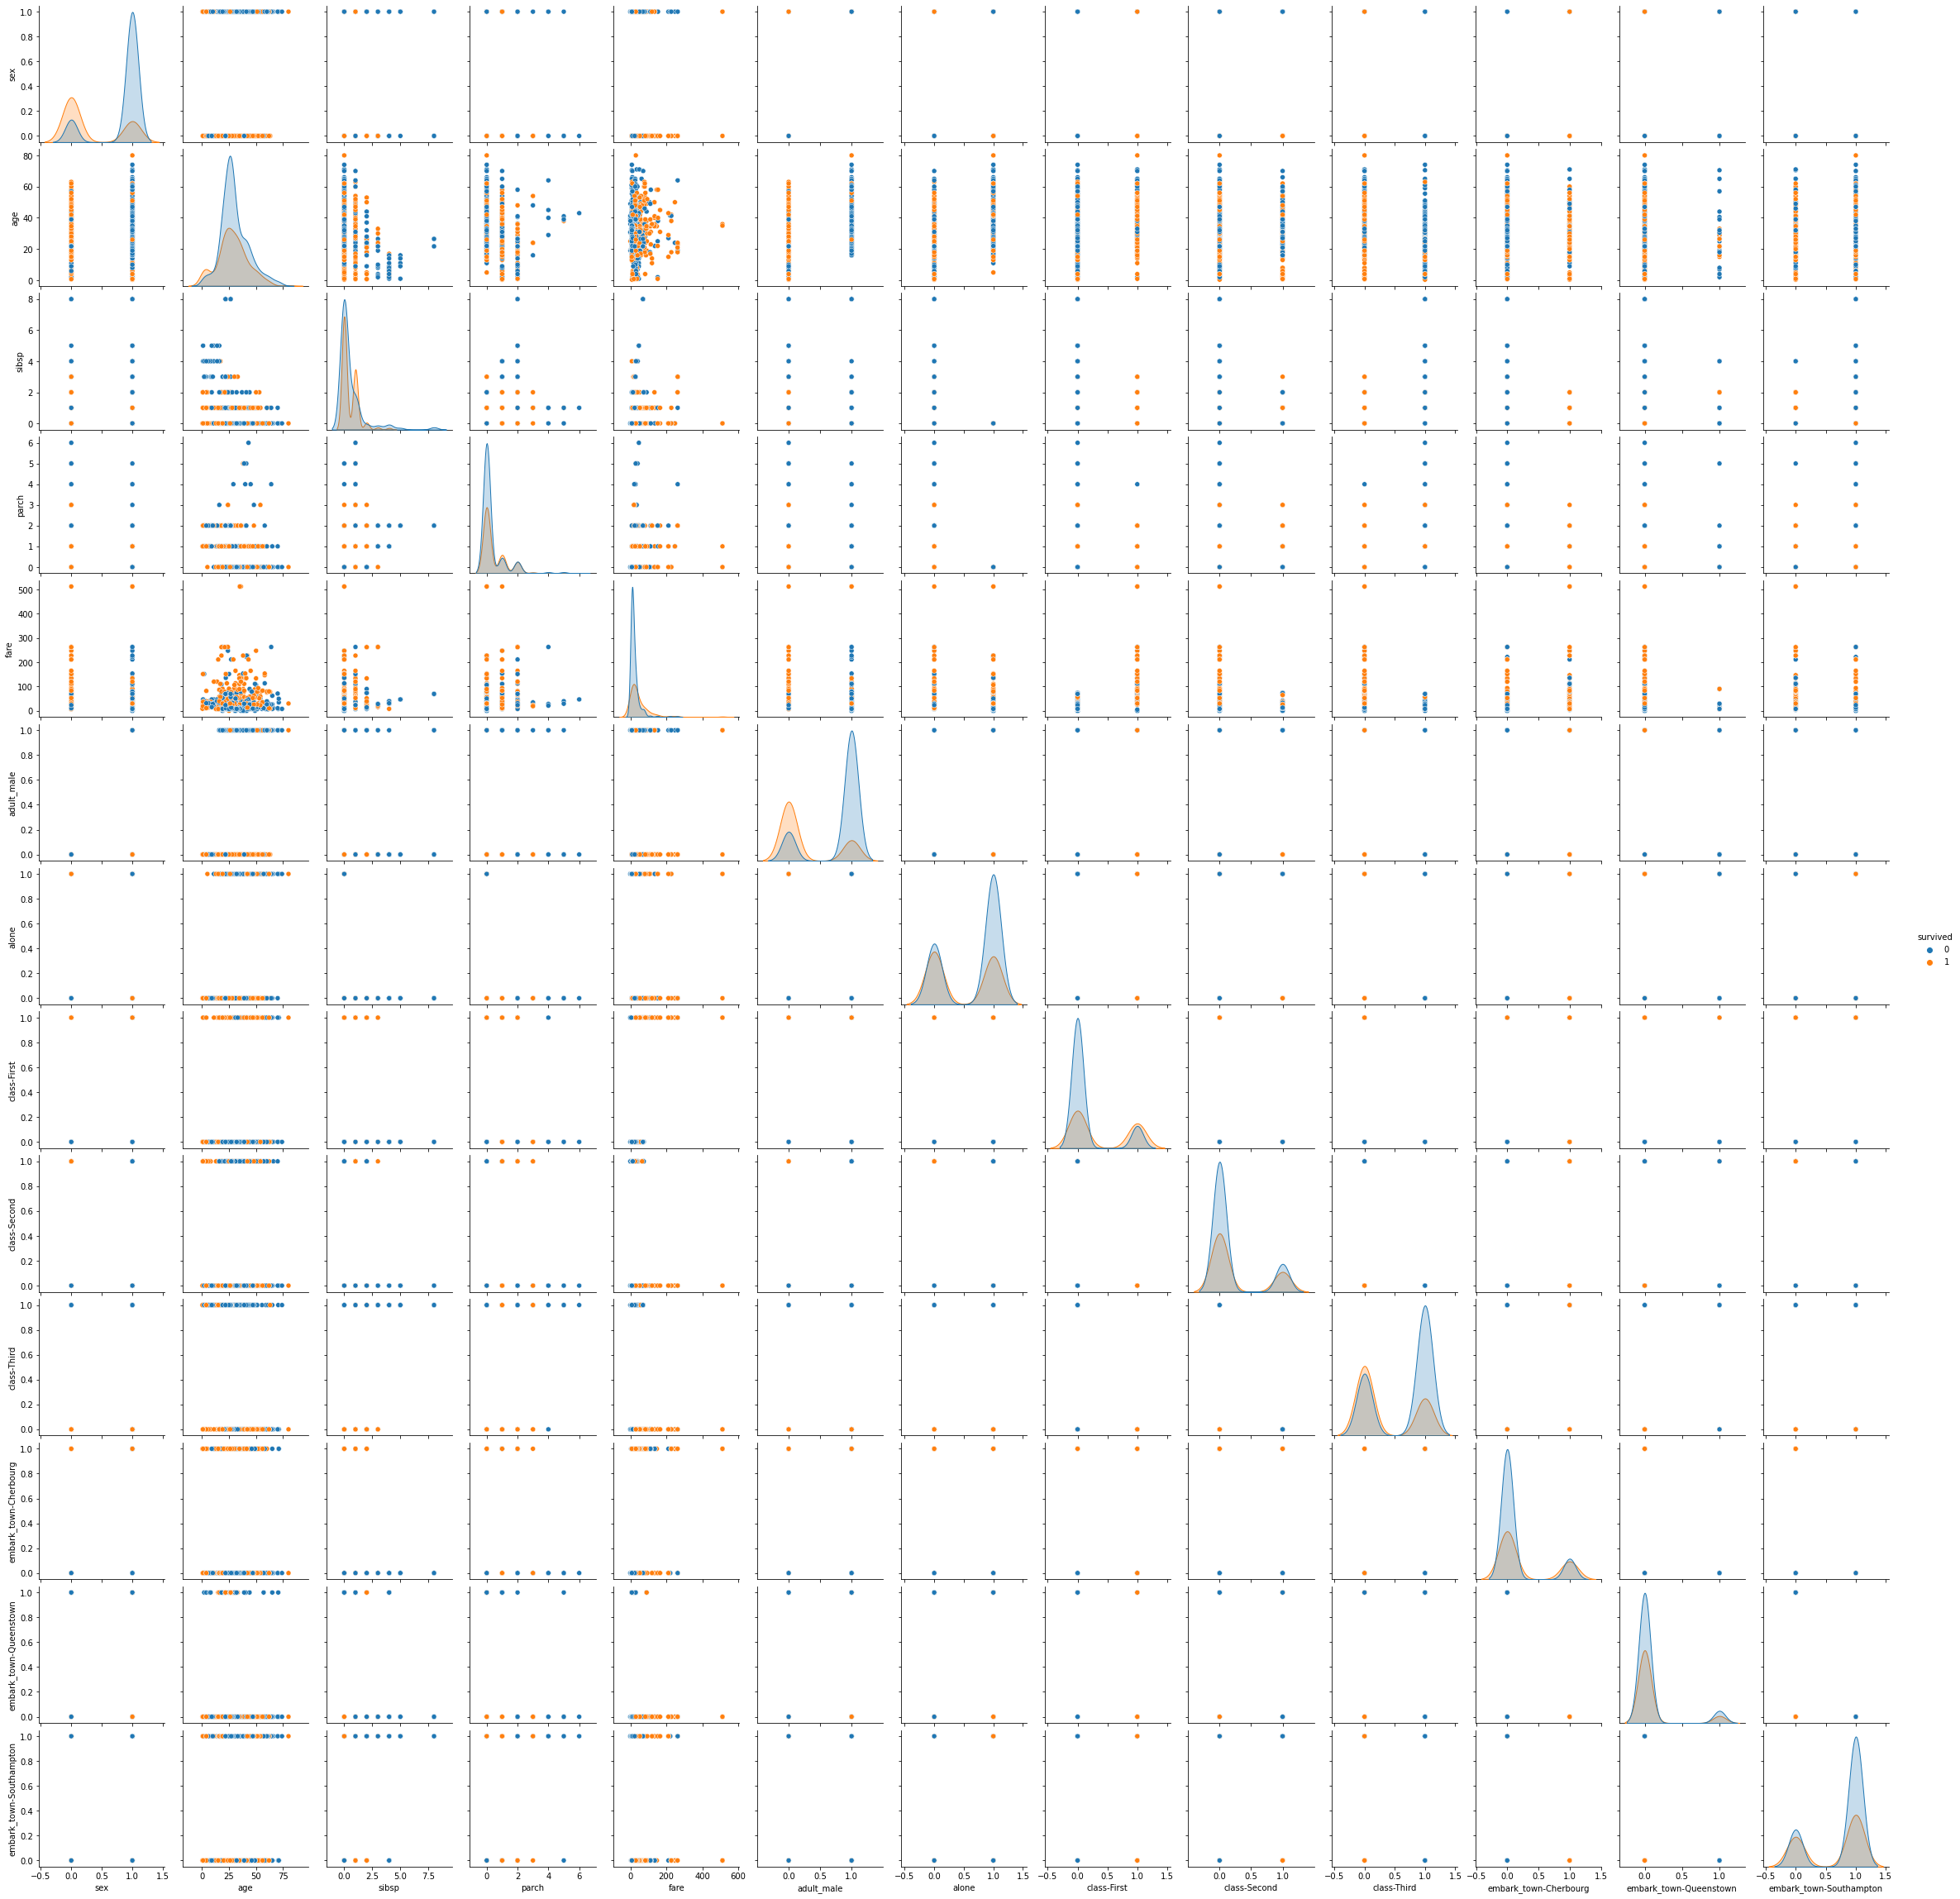

In [22]:
sns.pairplot(data=X, hue='survived')
plt.show()

In [23]:
# defino la variable a predecir
y = X.pop("survived")
print('Tamaño X',X.shape)
print('Tamaño y',y.shape)

Tamaño X (891, 13)
Tamaño y (891,)


In [24]:
# SEPARO DATASET EN CJTO ENTRENAMIENTO Y TEST 75/25, 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 16, stratify=y)

criterio='entropy'
# criterio='gini'
arbol=DecisionTreeClassifier(criterion=criterio, random_state = 16)
arbol.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=16)

[0.01224088 0.19803566 0.01949595 0.0183786  0.29998082 0.26157938
 0.01923198 0.02899504 0.00516261 0.10874618 0.01755904 0.01059385
 0.        ]


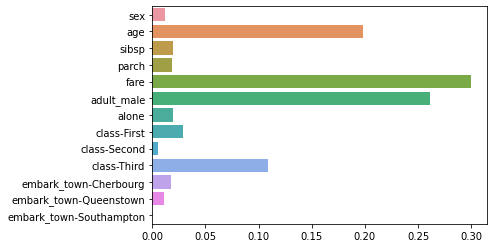

In [26]:
# Vemos que variables pesan mas en las decisiones del arbol
fi=arbol.feature_importances_
print(fi)
sns.barplot(y=X_train.columns,x=fi)

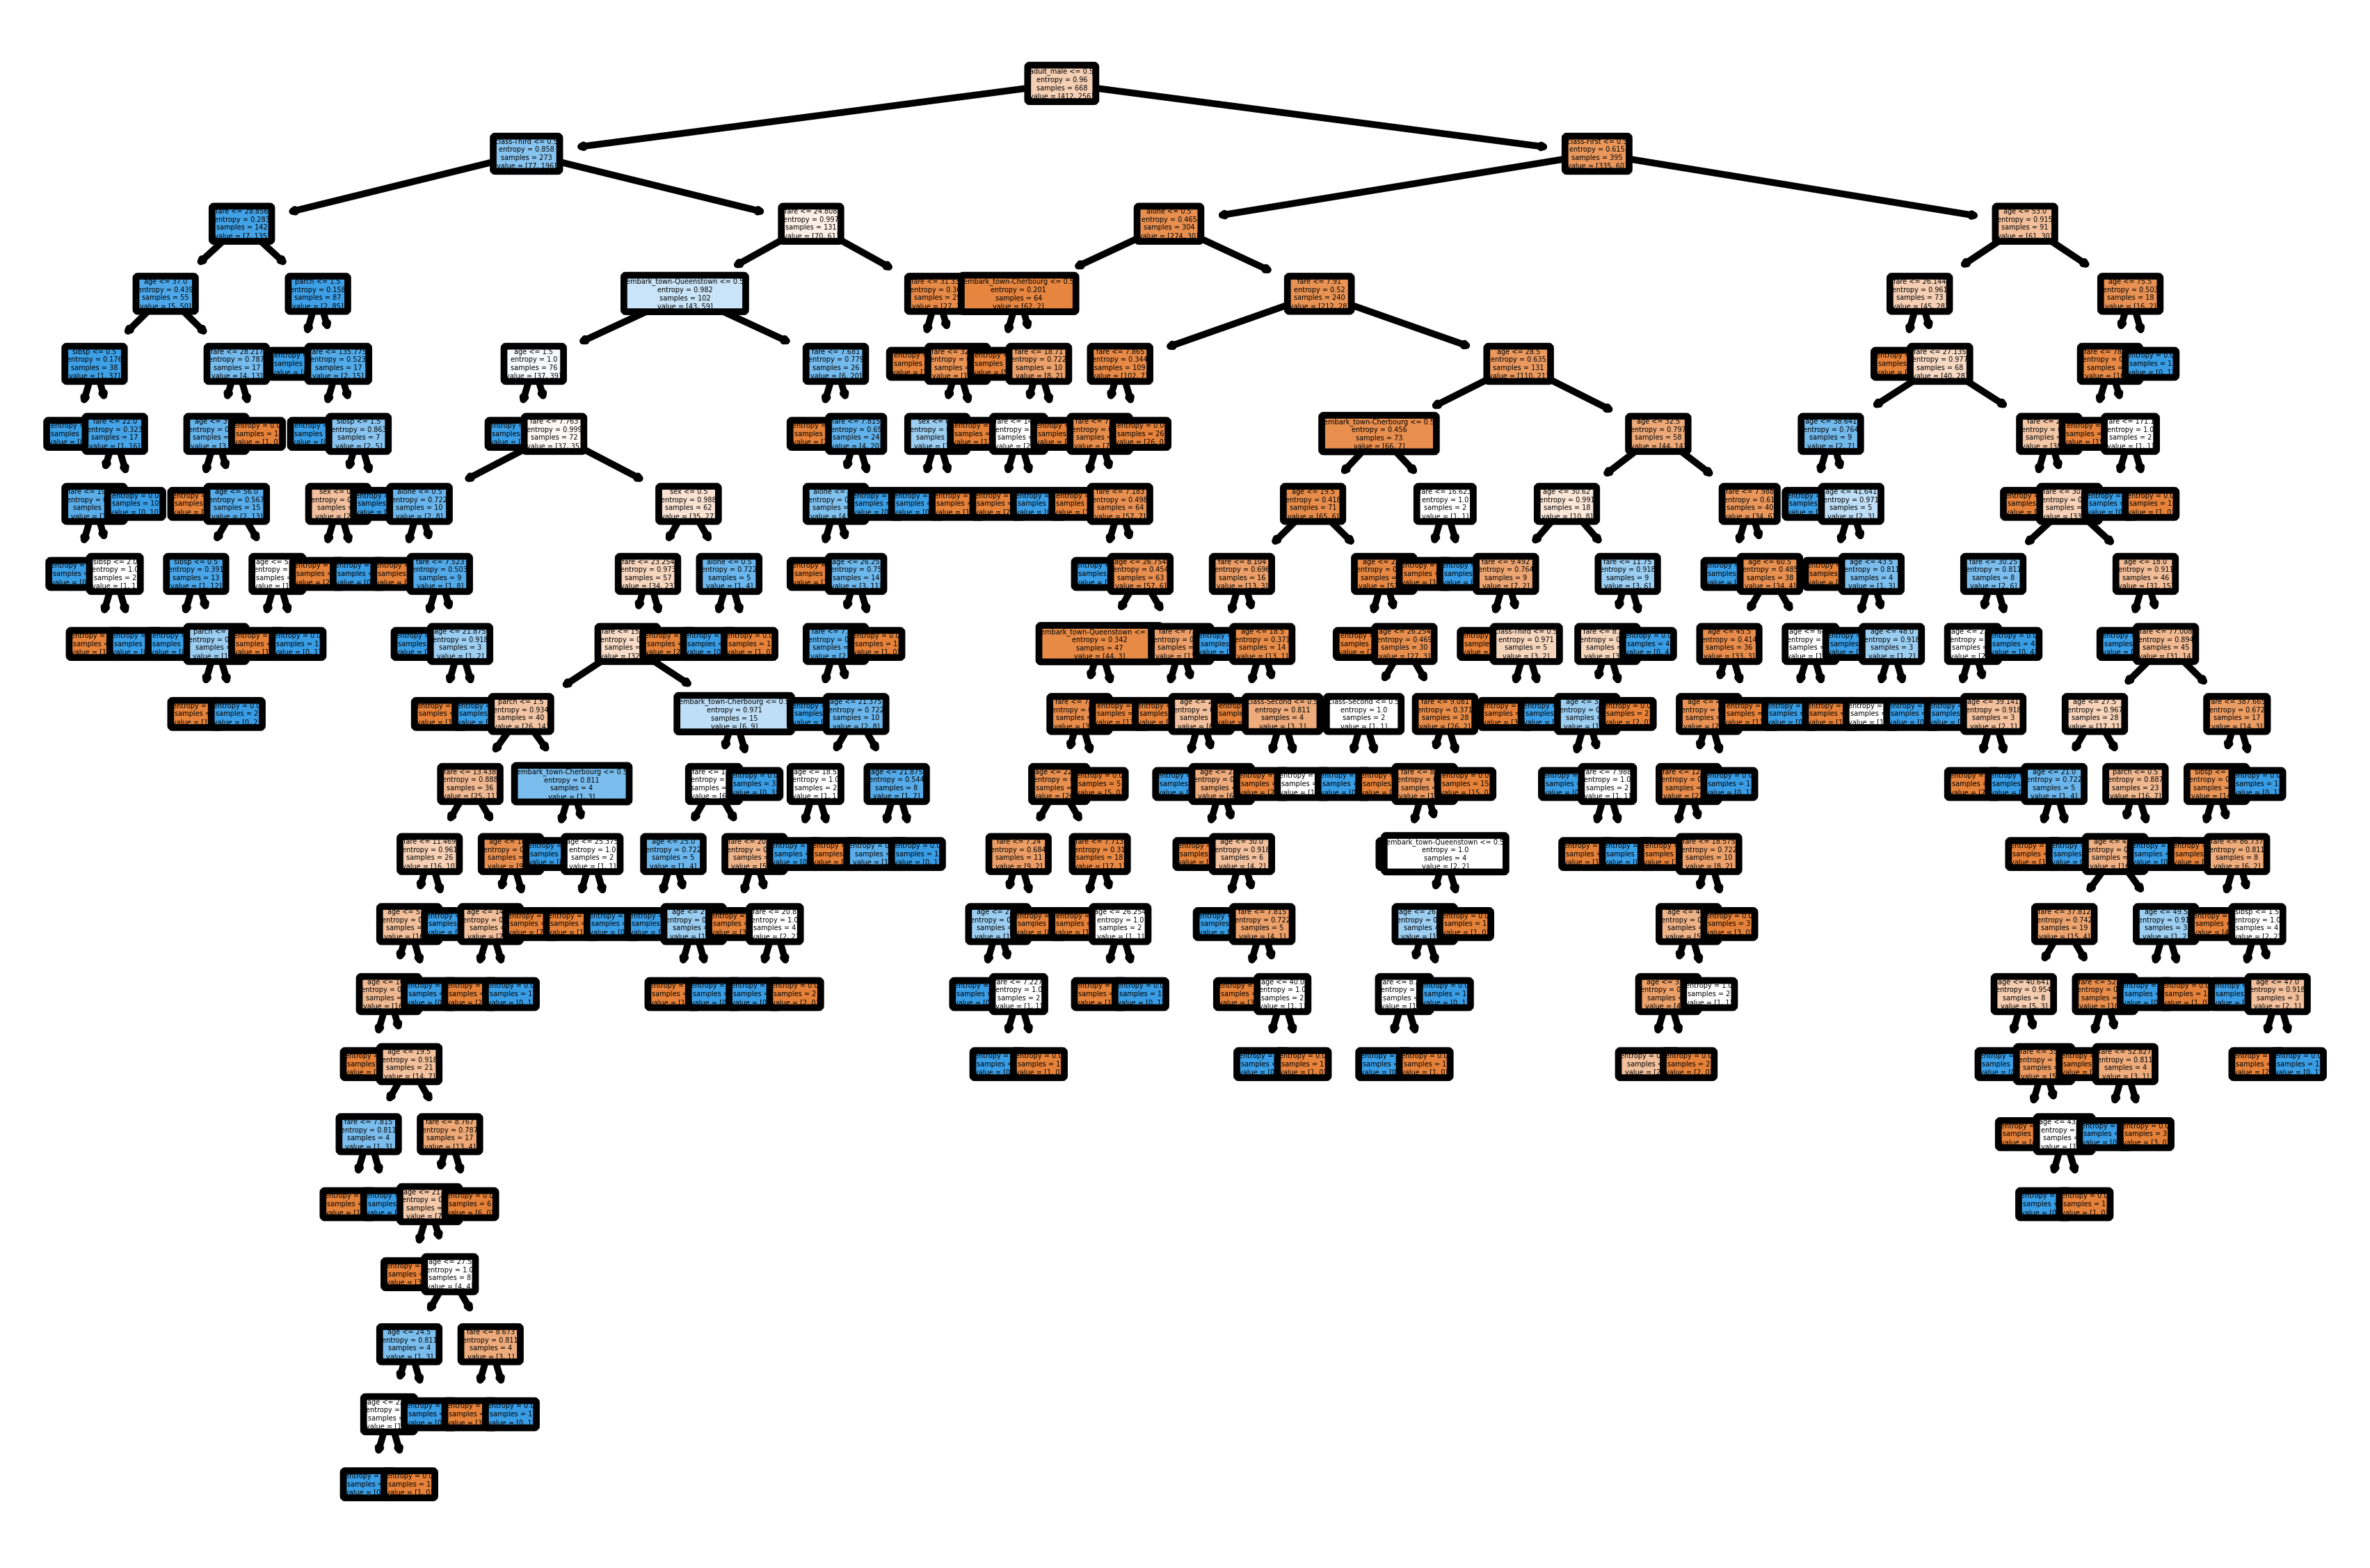

In [29]:
##%%   GRÁFICO DEL ÁRBOL
# plot_tree(decision_tree, *, max_depth=None, feature_names=None, class_names=None, 
# label='all', filled=False, impurity=True, node_ids=False, proportion=False, rounded=False, 
# precision=3, ax=None, fontsize=None)

list_features=list(X.columns)
plt.figure(dpi=700)
plot_tree(arbol, filled=True, rounded=True, feature_names=list_features)   # max_depth=2)
plt.show()
plt.close()


In [31]:
# Hago las predicciones
y_pred=arbol.predict(X_test)
print('Score train: ', arbol.score(X_train, y_train))
print('Score test:  ', arbol.score(X_test, y_test))
# Se ve claramente que el árbol está sobrejustando

Score train:  0.9925149700598802
Score test:   0.8071748878923767


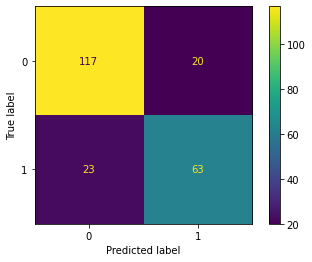

In [32]:
#%%    MATRIZ DE CONFUSION PARA VER MEJOR EL RENDIMIENTO DEL MODELO
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()

In [43]:
'''  Lucas ? QUÉ DICE EL MODELO QUE LE DEBIÓ SUCEDER?
features = ['sex', 'age', 'sibsp', 'parch','fare', 'adult_male', 'alone', 'class-First',
 'class-Second', 'class-Third', 'embark_town-Cherbourg', 'embark_town-Queenstown',
 'embark_town-Southampton'] '''
leo = {'sex': [1],'sibsp':[0], 'parch':[0], 'alone':[0], 'age': [25], 'embark_town-Cherbourg':[0], 
       'embark_town-Queenstown':[2],'embark_town-Southampton':[0], 'adult_male': [1], 'fare':[7.], 
       'class-Third': [0], 'class-Second':[0], 'class-First':[1]}
leo1 = pd.DataFrame.from_dict(leo)
print('Lucas sobrevivió, Árbol? ', arbol.predict(leo1))

# Rose? qué fue de ella?
ros = {'sex': [0],'sibsp':[0], 'parch':[1], 'alone':[0], 'age': [23], 'embark_town-Cherbourg':[0], 
       'embark_town-Queenstown':[0],'embark_town-Southampton':[1], 'adult_male': [0], 'fare':[70.], 
       'class-Third': [0], 'class-Second':[0], 'class-First':[1]}
rose = pd.DataFrame.from_dict(ros)
print(f'Rose sobrevivió, Árbol? {arbol.predict(rose)}')


Lucas sobrevivió, Árbol?  [0]
Rose sobrevivió, Árbol? [1]


In [34]:
# A ver qué puedo hacer para combatir el sobreajuste...
# Varias estrategias: poner una profundidad máxima, fijar la cantidad de muestras máxima en la hoja y podar
# Pruebo la primera
# Pregunto cuál fue la profundidad máxima del árbol que entrenamos
print(f'Máxima profundidad: {arbol.get_depth()}')    # 20
print(f'Cantidad de hojas: {arbol.get_n_leaves()}')  # 153

Máxima profundidad: 20
Cantidad de hojas: 153


In [37]:
depth=[i+1 for i in range(20)]
scor_train=[]
scor_test=[]
for dep in depth:
    tree=DecisionTreeClassifier(criterion=criterio, max_depth=dep, random_state = 16)
    tree.fit(X_train, y_train)
    pred=tree.predict(X_test)
     # Pregunto el tamaño del arbol
    print(f'Profundidad: {dep}')
    print(f'Precisión train: {tree.score(X_train, y_train)}')
    print(f'Precisión test: {tree.score(X_test, y_test)}')
  
    scor_train.append(tree.score(X_train, y_train))
    scor_test.append(tree.score(X_test, y_test))


Profundidad: 1
Precisión train: 0.7949101796407185
Precisión test: 0.7713004484304933
Profundidad: 2
Precisión train: 0.8083832335329342
Precisión test: 0.7757847533632287
Profundidad: 3
Precisión train: 0.8323353293413174
Precisión test: 0.8116591928251121
Profundidad: 4
Precisión train: 0.8338323353293413
Precisión test: 0.8116591928251121
Profundidad: 5
Precisión train: 0.8502994011976048
Precisión test: 0.8161434977578476
Profundidad: 6
Precisión train: 0.8682634730538922
Precisión test: 0.8071748878923767
Profundidad: 7
Precisión train: 0.8952095808383234
Precisión test: 0.8026905829596412
Profundidad: 8
Precisión train: 0.907185628742515
Precisión test: 0.7937219730941704
Profundidad: 9
Precisión train: 0.9221556886227545
Precisión test: 0.8026905829596412
Profundidad: 10
Precisión train: 0.9341317365269461
Precisión test: 0.7757847533632287
Profundidad: 11
Precisión train: 0.9416167664670658
Precisión test: 0.7847533632286996
Profundidad: 12
Precisión train: 0.9580838323353293
P

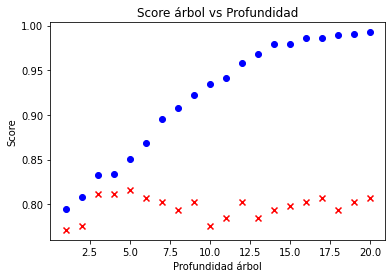

In [38]:
 plt.figure()
plt.scatter(x=depth, y=scor_train, marker='o', color='blue')
plt.scatter(x=depth, y=scor_test, marker='x', color='red')
plt.title('Score árbol vs Profundidad')
plt.xlabel('Profundidad árbol')
plt.ylabel('Score')
plt.show()
plt.close()
# En este caso no es eficiente
    

In [39]:
# Otro criterio es regular la cantidad de muestras máxima en cada hoja
samplex=[i+1 for i in range(20)]
scor_train1=[]
scor_test1=[]
for sam in samplex:
    tree=DecisionTreeClassifier(criterion=criterio, min_samples_leaf=sam, random_state = 16)
    tree.fit(X_train, y_train)
    pred=tree.predict(X_test)
    
    print(f'Profundidad: {sam}')
    print(f'Precisión train: {tree.score(X_train, y_train)}')
    print(f'Precisión test: {tree.score(X_test, y_test)}')
    
    scor_train1.append(tree.score(X_train, y_train))
    scor_test1.append(tree.score(X_test, y_test))

Profundidad: 1
Precisión train: 0.9925149700598802
Precisión test: 0.8071748878923767
Profundidad: 2
Precisión train: 0.9266467065868264
Precisión test: 0.8026905829596412
Profundidad: 3
Precisión train: 0.9026946107784432
Precisión test: 0.8026905829596412
Profundidad: 4
Precisión train: 0.8877245508982036
Precisión test: 0.7982062780269058
Profundidad: 5
Precisión train: 0.8817365269461078
Precisión test: 0.820627802690583
Profundidad: 6
Precisión train: 0.8772455089820359
Precisión test: 0.8026905829596412
Profundidad: 7
Precisión train: 0.8697604790419161
Precisión test: 0.8071748878923767
Profundidad: 8
Precisión train: 0.8652694610778443
Precisión test: 0.8026905829596412
Profundidad: 9
Precisión train: 0.8637724550898204
Precisión test: 0.8026905829596412
Profundidad: 10
Precisión train: 0.8577844311377245
Precisión test: 0.8161434977578476
Profundidad: 11
Precisión train: 0.8562874251497006
Precisión test: 0.8116591928251121
Profundidad: 12
Precisión train: 0.8547904191616766
P

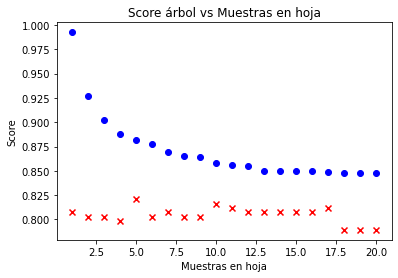

In [40]:
plt.figure()
plt.scatter(x=samplex, y=scor_train1, marker='o', color='blue')
plt.scatter(x=samplex, y=scor_test1, marker='x', color='red')
plt.title('Score árbol vs Muestras en hoja')
plt.xlabel('Muestras en hoja')
plt.ylabel('Score')
plt.show()
plt.close()

# tampoco es eficiente

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

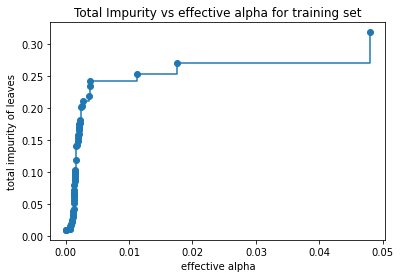

In [44]:
# Poda posterior
clas = DecisionTreeClassifier(random_state=16)
path = clas.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

In [45]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=16, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.15486253993246674


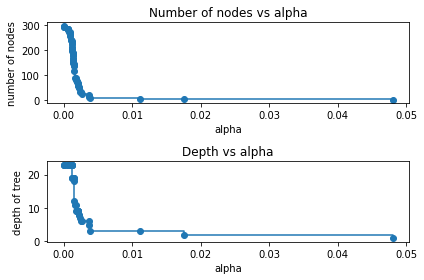

In [46]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

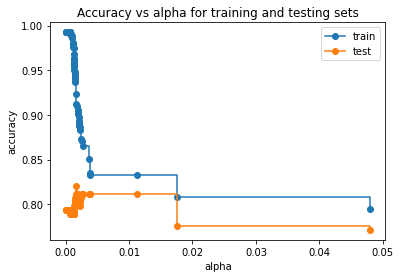

In [47]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [48]:
alfas=ccp_alphas
scor=np.array(test_scores)

alfa_score=pd.DataFrame({'alpha':alfas, 'score':scor})
indice=alfa_score['score'].idxmax()
alfa_max=alfa_score['alpha'].iloc[indice]
print('Mejor alfa', alfa_max)
alfa_score.head()

Mejor alfa 0.0016836127371678785


,alpha,score
0,0.000000,0.793722
1,0.000053,0.793722
2,0.000075,0.793722
3,0.000624,0.793722
4,0.000624,0.793722


Score train:  0.8458083832335329
Score test:   0.8295964125560538


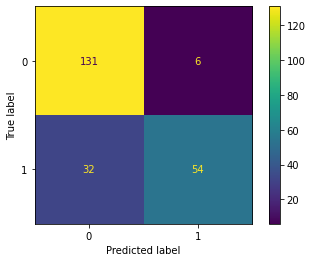

In [49]:
# veo cómo se porta con el mejor valor de alfa que encontramos, la profundidad y las muestras x hoja
arbol_alfa=DecisionTreeClassifier(criterion=criterio, random_state = 16, ccp_alpha=alfa_max, max_depth=5, min_samples_leaf=5)   #, class_weight='balanced')
arbol_alfa.fit(X_train, y_train)
y_pred_alfa = arbol_alfa.predict(X_test)
print('Score train: ', arbol_alfa.score(X_train, y_train))
print('Score test:  ', arbol_alfa.score(X_test, y_test))
cm_alfa = confusion_matrix(y_test, y_pred_alfa)
ConfusionMatrixDisplay(cm_alfa).plot()

In [50]:
# Rose? qué fue de ella?
ros = {'sex': [0],'sibsp':[0], 'parch':[1], 'alone':[0], 'age': [23], 'embark_town-Cherbourg':[0], 
       'embark_town-Queenstown':[0],'embark_town-Southampton':[1], 'adult_male': [0], 'fare':[70.], 
       'class-Third': [0], 'class-Second':[0], 'class-First':[1]}
rose = pd.DataFrame.from_dict(ros)
print(f'Rose sobrevivió, Árbol? {arbol_alfa.predict(rose)}')

Rose sobrevivió, Árbol? [1]
